### Move watermask into local folder, prepaire for merge

In [ ]:
# Move Peel watermask
import shutil
dir_water = r"Z:\Kathrin\dem_processing\watermasks\tiled_watermasks"
peel_target = r"C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_Peel_original"

In [ ]:
path_peel= r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\tile_shapes_peel.json'
peel_tile = gpd.read_file(path_peel)['tile_name'].tolist()


In [ ]:
# Move Tukto watermask
import shutil
dir_water = r"Z:\Kathrin\dem_processing\watermasks\tiled_watermasks"
tukto_dir = r"C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\data_test_tuktoyaktuk\images"
tukto_target = r"C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_tuktoyaktuk"
path_tukto = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\tile_shapes_tuktoyaktuk.json'
tukto_tile = gpd.read_file(path_tukto)['tile_name'].tolist()

In [ ]:
# Search in watertile
for watertile in os.listdir(dir_water):
    # Copy watertile to peeldir
    if watertile in peel_tile:
        img_name = os.listdir(os.path.join(dir_water,watertile))
        for img in img_name:
            img_path = os.path.join(dir_water, watertile, img)
            shutil.copy(img_path, peel_target)
    # Copy watertile to tuktodir                
    # if watertile in tukto_tile:
    #     img_name = os.listdir(os.path.join(dir_water,watertile))
    #     for img in img_name:
    #         img_path = os.path.join(dir_water, watertile, img)
    #         shutil.copy(img_path, tukto_target)
    #         print('moved Tukto', img_path)


For empty images:

In [ ]:
# Move Tukto watermask
import shutil
dir_water = r"Z:\Kathrin\dem_processing\watermasks\tiled_watermasks"
tukto_dir = r"C:\Users\sophi\Documents\thesis\watermask\images"
tukto_target = r"C:\Users\sophi\Documents\thesis\watermask"
path_tukto = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\tile_shapes_tuktoyaktuk.json'
tukto_tile = gpd.read_file(path_tukto)['tile_name'].tolist()

In [ ]:
tottile = os.listdir(r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\data_test_tukto_negative\images')
tukto_tile = ['_'.join(file.split('_')[1:6]) for file in tottile]
tukto_tile = list(set(tukto_tile))

In [ ]:
# Search in watertile
for watertile in os.listdir(dir_water):
    # Copy watertile to peeldir
    if watertile in peel_tile:
        img_name = os.listdir(os.path.join(dir_water,watertile))
        for img in img_name:
            img_path = os.path.join(dir_water, watertile, img)
            shutil.copy(img_path, peel_target)


***
### Merge water tiles that were split

For tukto watermask:

In [ ]:
# Merge split water mask. Most watermask end with _8. Some masks are split in _9 and _8, _10. Here we merge them together for further processing
not_merged_dir = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_tuktoyaktuk_not_merged'
source_dir = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_tuktoyaktuk'
target_dir = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_tuktoyaktuk_merged'

tobemerged = []
not_merged = os.listdir(not_merged_dir)
for tile_name in not_merged:
    split_name = tile_name.split('_')
    new_name = '_'.join(split_name[:5]) +'_8.tif'
    tobemerged.append(new_name)

In [ ]:
# Merge split water mask. Most watermask end with _8. Some masks are split in _9 and _8, _10. Here we merge them together for further processing
not_merged_dir = r'C:\Users\sophi\Documents\thesis\watermask\not_merged'
source_dir = r'C:\Users\sophi\Documents\thesis\watermask\images'
target_dir = r'C:\Users\sophi\Documents\thesis\watermask\merged'

tobemerged = []
not_merged = os.listdir(not_merged_dir)
for tile_name in not_merged:
    split_name = tile_name.split('_')
    new_name = '_'.join(split_name[:5]) +'_8.tif'
    tobemerged.append(new_name)

In [ ]:
from rasterio.merge import merge


for i in range(len(not_merged)):
    merge_img = []
    # Get image path
    not_merged_file = os.path.join(not_merged_dir, not_merged[i])
    tobemerged_file = os.path.join(source_dir, tobemerged[i])

    if os.path.exists(tobemerged_file):
        # read image
        not_merged_img = rasterio.open(not_merged_file)
        tobemerged_img = rasterio.open(tobemerged_file)
        merge_img.append(not_merged_img)
        merge_img.append(tobemerged_img)
        # merge
        resolved_tile, resolved_transf = merge(merge_img)

        # Write merged image
        out_meta = not_merged_img.meta.copy()
        out_meta.update({"driver": "GTiff",
                            "height": resolved_tile.shape[1],
                            "width": resolved_tile.shape[2],
                            "transform": resolved_transf})

        # Write the merged GeoTIFF to a new file
        output_file = os.path.join(target_dir, tobemerged[i])
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(resolved_tile)
    else:
        shutil.copy(not_merged_file, os.path.join(target_dir, tobemerged[i]))

Same for Peel:

In [ ]:
# Merge split water mask. Most watermask end with _9. Some masks are split in _9 and _8, _10. Here we merge them together for further processing
not_merged_dir = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_Peel_not_merged'
source_dir = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_Peel_original'
target_dir = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_Peel_merged'

tobemerged = []
not_merged = os.listdir(not_merged_dir)
for tile_name in not_merged:
    split_name = tile_name.split('_')
    new_name = '_'.join(split_name[:5]) +'_9.tif'
    tobemerged.append(new_name)

In [ ]:
from rasterio.merge import merge
import shutil

for i in range(len(not_merged)):
    merge_img = []
    # Get image path
    not_merged_file = os.path.join(not_merged_dir, not_merged[i])
    tobemerged_file = os.path.join(source_dir, tobemerged[i])

    if os.path.exists(tobemerged_file):
        # read image
        not_merged_img = rasterio.open(not_merged_file)
        tobemerged_img = rasterio.open(tobemerged_file)
        merge_img.append(not_merged_img)
        merge_img.append(tobemerged_img)
        # merge
        resolved_tile, resolved_transf = merge(merge_img)

        # Write merged image
        out_meta = not_merged_img.meta.copy()
        out_meta.update({"driver": "GTiff",
                            "height": resolved_tile.shape[1],
                            "width": resolved_tile.shape[2],
                            "transform": resolved_transf})

        # Write the merged GeoTIFF to a new file
        output_file = os.path.join(target_dir, tobemerged[i])
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(resolved_tile)
    else:
        shutil.copy(not_merged_file, os.path.join(target_dir, tobemerged[i]))

Rename files

In [ ]:
# name_dir =  r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_tuktoyaktuk_merged' #r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_Peel_merged'
name_dir =   r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_Peel_merged'
orig_name = os.listdir(name_dir)


In [ ]:
for name in orig_name:
    if name.endswith('tif'):
        name_part = name.split('_')
        new_name = '_'.join(name_part[:5]) +'.tif'
        old_file = os.path.join(name_dir,name)
        new_file = os.path.join(name_dir,new_name)
        if os.path.exists(old_file):
            os.rename(old_file, new_file)

In [ ]:
for name in orig_name:
    if name.endswith('tif.tif'):
        new_name = name[:-4]
        old_file = os.path.join(name_dir,name)
        new_file = os.path.join(name_dir,new_name)
        if os.path.exists(old_file):
            os.rename(old_file, new_file)

***
### Merge neighbouring water mask

In [ ]:
tile_name = 'tile_16_41_1_1' 

# Read image
image_dir = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\2010_2021\images'
img_name = '2011-2021_tile_15_41_9_1_3_0.tif' #'2011-2021_tile_15_41_9_1_1_0.tif'
image_file = os.path.join(image_dir, img_name)
image_tile = rasterio.open(image_file)

# Read water tiles and neighbour water tiles
water_merge = []
water_dir = r'C:\Users\sophi\Documents\thesis\renku_clone\master-thesis\data\Sophia\data_clean\watermask_Peel_merged'
water_name = 'watermask_15_41_9_1.tif'
water_file = os.path.join(water_dir, water_name)
water_tile = rasterio.open(water_file)
water_merge.append(water_tile)

water_name_below = 'watermask_15_41_8_1.tif'
water_file_below = os.path.join(water_dir, water_name_below)
water_tile_below = rasterio.open(water_file_below)
water_merge.append(water_tile_below)

In [ ]:
original_tile = tile_name.split('_')
original_tile

['tile', '16', '41', '1', '1']

In [ ]:
y1 = int(original_tile[3])
x1 = int(original_tile[4])
y2 = int(original_tile[1])
x2 = int(original_tile[2])

# below: y is lower
if y1>2:
    y1_low = str(y1-1)
    y2_low = str(y2)
    x1_low = str(x1)
    x2_low = str(x2)
else:
    y1_low = str(10)
    y2_low = str(y2-1)
    x1_low = str(x1)
    x2_low = str(x2)

# above
if y1<=9:
    y1_above = str(y1+1)
    y2_above = str(y2)
    x1_above = str(x1)
    x2_above = str(x2)
else:
    y1_above = str(1)
    y2_above = str(y2+1)
    x1_above = str(x1)
    x2_above = str(x2)  

# left: x is higher (for image not tile, it is the other way around)
if x1<=9:
    y1_left = str(y1)
    y2_left = str(y2)
    x1_left = str(x1+1)
    x2_left = str(x2)
else:
    y1_left = str(y1)
    y2_left = str(y2)
    x1_left = str(1)
    x2_left = str(x2+1)     

# right:
if x1>2:
    y1_right = str(y1)
    y2_right = str(y2)
    x1_right = str(x1-1)
    x2_right = str(x2)
else:
    y1_right = str(y1)
    y2_right = str(y2)
    x1_right = str(10)
    x2_right = str(x2-1)  

In [ ]:
water_name_below = '_'.join(['watermask',y2_low, x2_low, y1_low, x1_low]) + '.tif'
water_name_above = '_'.join(['watermask',y2_above, x2_above, y1_above, x1_above]) + '.tif'
water_name_left = '_'.join(['watermask',y2_left, x2_left, y1_left, x1_left]) + '.tif'
water_name_right = '_'.join(['watermask',y2_right, x2_right, y1_right, x1_right]) + '.tif'
tile_name, water_name_below,water_name_above,water_name_left,water_name_right

('tile_16_41_1_1',
 'watermask_15_41_10_1.tif',
 'watermask_16_41_2_1.tif',
 'watermask_16_41_1_2.tif',
 'watermask_16_40_1_10.tif')

In [ ]:
# merge neighbour water tiles
from rasterio.merge import merge
merged_water, merged_transf = merge(water_merge)

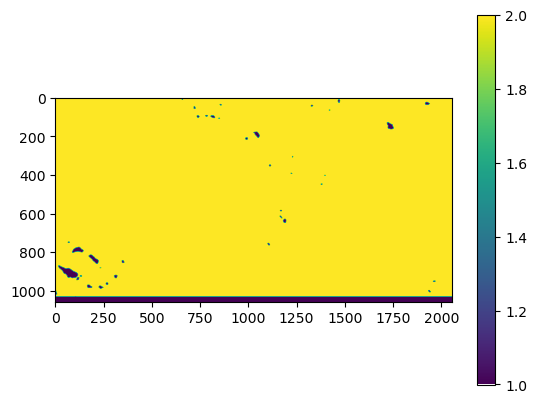

In [ ]:
# Make water tiles binary
merged_water = merged_water[0]
merged_water[merged_water>0]= 2
merged_water[merged_water <= 0] = 1
plt.imshow(merged_water)
plt.colorbar()

Extract water mask according to where the input image is

In [ ]:
# Create a cropping mask with the boundary of input image
mask_geometry = [shapely.geometry.box(*image_tile.bounds)]
mask_array = geometry_mask(mask_geometry, out_shape=merged_water.shape, transform = merged_transf, invert=True)

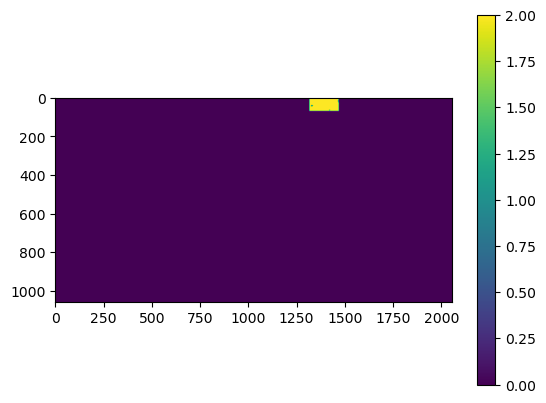

In [ ]:
croped_water = merged_water*mask_array
plt.imshow(croped_water)
plt.colorbar()

In [ ]:
# Find indices where the value is 1
indices = np.where(croped_water >0)

# Find the top-left, top-right, bottom-left, and bottom-right corners
top_left = (min(indices[0]), min(indices[1]))
bottom_right = (max(indices[0]), max(indices[1]))



In [ ]:
extracted_water = croped_water[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]


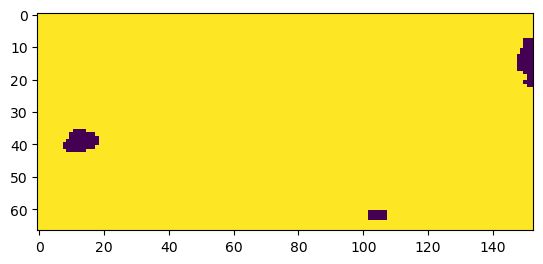

In [ ]:
plt.imshow(extracted_water)